In [1]:
import pandas as pd

In [2]:
# Loading the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
62,63,Female,67,47,52
8,9,Male,64,19,3
186,187,Female,54,101,24
99,100,Male,20,61,49
178,179,Male,59,93,14
75,76,Male,26,54,54
21,22,Male,25,24,73


In [5]:
# Structure and missing values
print("Dataset Info :")
data.info()
print("\nMissing Values :")
print(data.isnull().sum())

Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
for i in data.columns:
  print(i,':','\n',data[i].unique(),'\n')

CustomerID : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] 

Gender : 
 ['Male' 'Female'] 

Age : 
 [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 

In [7]:
print('Data Shape')
data.shape

Data Shape


(200, 5)

In [8]:
print('\n','Data Type')
data.dtypes


 Data Type


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
print("\nDataset Description :")
data.describe()


Dataset Description :


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

# Drop CustomerID
data = data.drop('CustomerID', axis=1)

# Encode Gender
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

In [12]:
# Adding new features
# Income-to-Age Ratio
data['Income_per_Age'] = data['Annual Income (k$)'] / data['Age']

# Interaction term
data['Gender_Score'] = data['Gender'] * data['Spending Score (1-100)']

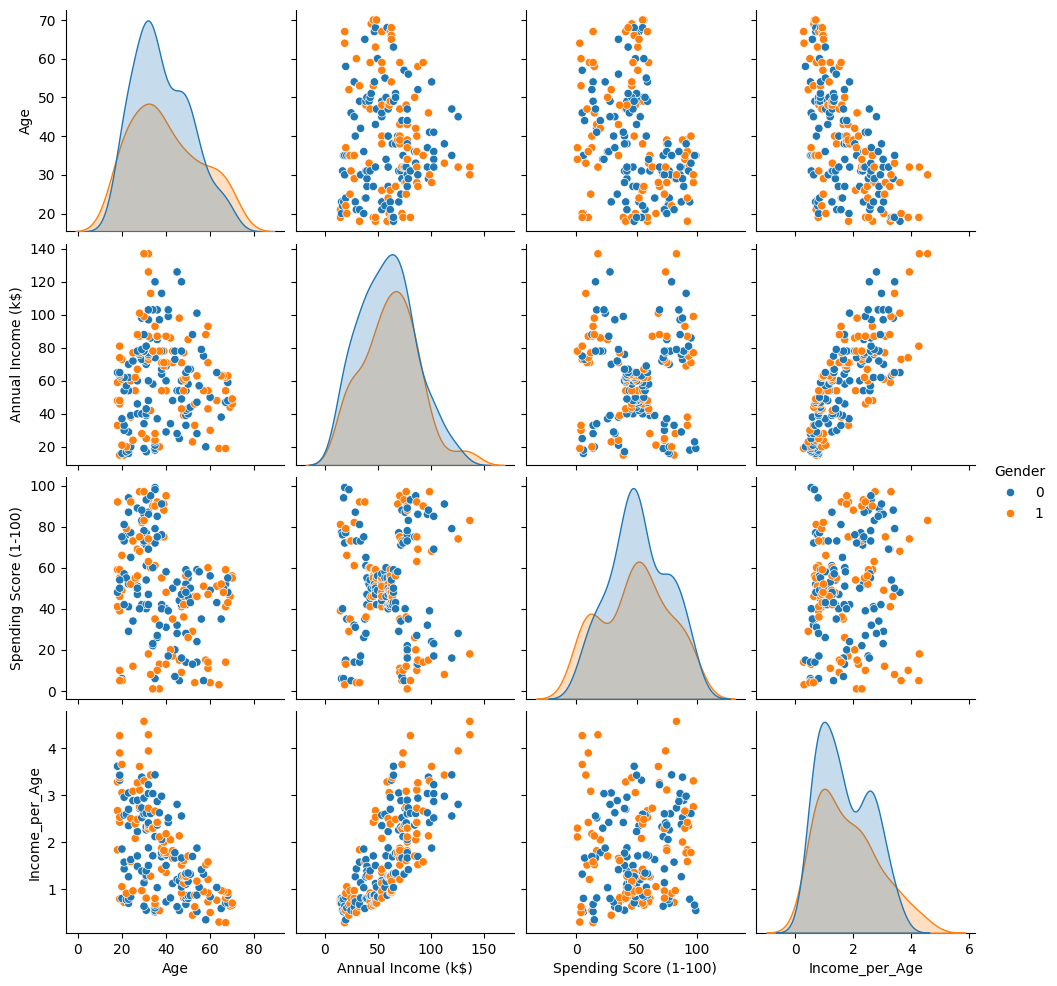

In [13]:
# Visualize Important Relationships
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_per_Age', 'Gender']], hue='Gender')


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Gender_Score
0,1.128152,-1.424569,-1.738999,-0.434801,-1.010344,0.582576
1,1.128152,-1.281035,-1.738999,1.195704,-1.089296,1.968484
2,-0.886405,-1.352802,-1.700830,-1.715913,-0.999291,-0.704338
3,-0.886405,-1.137502,-1.700830,1.040418,-1.108862,-0.704338
4,-0.886405,-0.563369,-1.662660,-0.395980,-1.263499,-0.704338


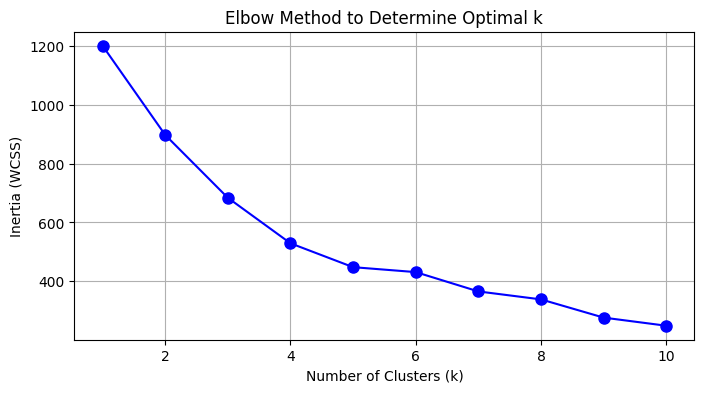

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []                          # Store Within-Cluster Sum of Squares (WCSS)
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Create model with k clusters
    kmeans.fit(scaled_df)                           # Fit model to our scaled data
    inertia.append(kmeans.inertia_)                 # Save the WCSS value

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)  # Line plot of k vs inertia
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

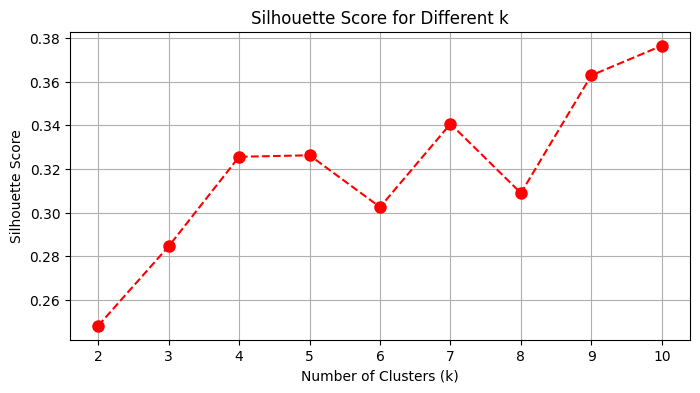

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) # New KMeans model
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'ro--', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

# Adds the "Cluster" column to both the original and scaled datasets.
data['Cluster'] = kmeans.labels_
scaled_df['Cluster'] = kmeans.labels_

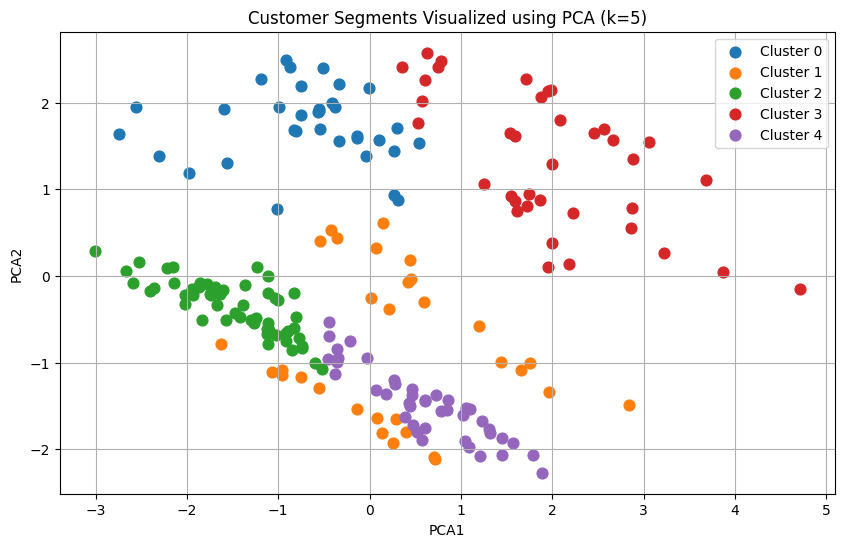

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df.drop('Cluster', axis=1))

# Create a new DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = scaled_df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', s=60)

# Adds labels, title, legend, and displays the plot.
plt.title('Customer Segments Visualized using PCA (k=5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Cluster Profiling (Business Insights)
cluster_profile = data.groupby('Cluster').mean(numeric_only=True)
cluster_profile

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Gender_Score
Cluster,,,,,,
0,1.000000,53.676471,47.323529,39.941176,0.905700,39.941176
1,0.548387,40.419355,90.000000,15.741935,2.403069,6.419355
2,0.000000,44.053571,42.178571,46.839286,0.970445,0.000000
3,1.000000,28.054054,64.405405,73.297297,2.305961,73.297297
4,0.000000,28.261905,70.666667,68.071429,2.508970,0.000000


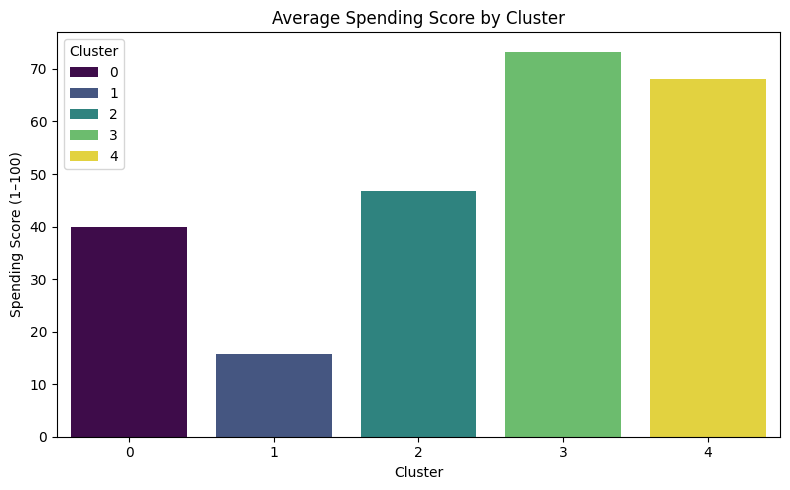

In [20]:
# Average Spending Score by Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_profile.reset_index(), x="Cluster", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
plt.title("Average Spending Score by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spending Score (1–100)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

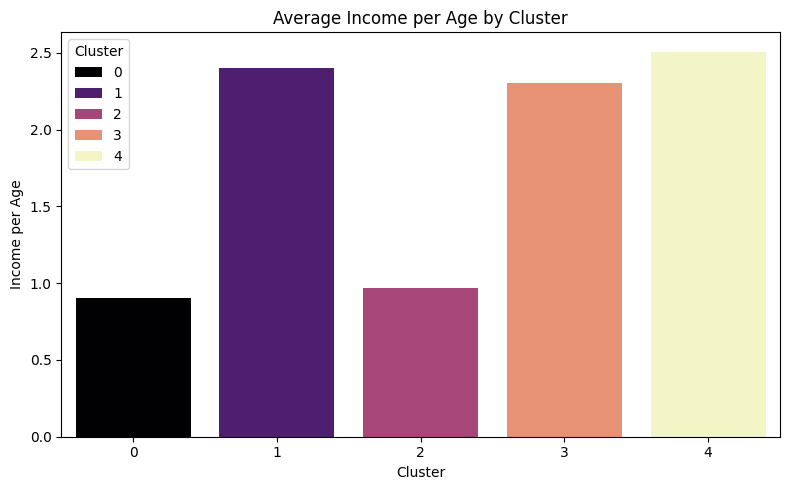

In [21]:
# Average Income per Age by Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_profile.reset_index(), x="Cluster", y="Income_per_Age", hue="Cluster", palette="magma")
plt.title("Average Income per Age by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Income per Age")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

#  **Customer Personas (k = 5)**

These personas are derived from real cluster-wise means and gender distribution.  
They help in developing **data-driven marketing strategies**, customer engagement plans, and product targeting.

##  **Cluster 0** – **Mature Gentlemen, Modest Spenders**
- **Average Age**: ~54  
- **Annual Income**: ~47k  
- **Spending Score**: ~40  
- **Gender**: 100% Male  
- **Insight**: Older male customers with steady, modest spending habits. Likely loyal and value-conscious.
- **Business Strategy**:
  - Offer bundled discounts and quality-focused products  
  - Highlight durability and practicality in campaigns  
  - Build long-term loyalty programs


## **Cluster 1** – **Rich but Reserved Mix**
- **Average Age**: ~40  
- **Annual Income**: ~90k (highest!)  
- **Spending Score**: ~16 (very low)  
- **Gender**: Mixed (≈55% Male, 45% Female)  
- ** Insight**: Wealthy mid-aged customers who spend cautiously. Possibly brand-loyal or selective.
- **Business Strategy**:
  - Emphasize product quality and trust  
  - Introduce exclusive loyalty programs  
  - Promote long-term value over flashy offers


##  **Cluster 2** – **Mid-Age Practical Women**
- **Average Age**: ~44  
- **Annual Income**: ~42k  
- **Spending Score**: ~47  
- **Gender**: 100% Female  
- **Insight**: Practical women with moderate income and average spending patterns. Value-seeking.
- **Business Strategy**:
  - Focus on combo deals and seasonal offers  
  - Promote reliable, mid-range products  
  - Engage via influencer or email-based marketing


##  **Cluster 3** – **Young High-Spending Males**
- **Average Age**: ~28  
- **Annual Income**: ~64k  
- **Spending Score**: ~73 (highest!)  
- **Gender**: 100% Male  
- **Insight**: Young men with high income and impulsive shopping behavior. Likely trend-driven and tech-savvy.
- **Business Strategy**:
  - Promote electronics, fashion, and lifestyle products  
  - Use social media influencers and app-first campaigns  
  - Introduce cashback, loyalty, and early-access offers


##  **Cluster 4** – **Young Empowered Women Shoppers**
- **Average Age**: ~28  
- **Annual Income**: ~71k  
- **Spending Score**: ~68  
- **Gender**: 100% Female  
- **Insight**: Young, high-income women with strong interest in fashion, wellness, and lifestyle shopping.
- **Business Strategy**:
  - Highlight premium products and curated experiences  
  - Use Instagram, reels, and influencer tie-ups  
  - Provide personalized shopping and VIP perks